In [198]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [199]:
train = pd.read_csv('laptops_train.csv')
test = pd.read_csv('laptops_test.csv')

In [200]:
train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [201]:
data = train.append(test)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4752\3862322379.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train.append(test)


In [202]:
print(train.shape,test.shape,data.shape)

(977, 13) (325, 13) (1302, 13)


<center><h3> Data Preprocessing </h3></center>

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1302 non-null   object 
 1   Model Name                1302 non-null   object 
 2   Category                  1302 non-null   object 
 3   Screen Size               1302 non-null   object 
 4   Screen                    1302 non-null   object 
 5   CPU                       1302 non-null   object 
 6   RAM                       1302 non-null   object 
 7    Storage                  1302 non-null   object 
 8   GPU                       1302 non-null   object 
 9   Operating System          1302 non-null   object 
 10  Operating System Version  1132 non-null   object 
 11  Weight                    1302 non-null   object 
 12  Price                     1302 non-null   float64
dtypes: float64(1), object(12)
memory usage: 142.4+ KB


In [204]:
data = data.drop('Operating System Version',axis=1)

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 324
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1302 non-null   object 
 1   Model Name        1302 non-null   object 
 2   Category          1302 non-null   object 
 3   Screen Size       1302 non-null   object 
 4   Screen            1302 non-null   object 
 5   CPU               1302 non-null   object 
 6   RAM               1302 non-null   object 
 7    Storage          1302 non-null   object 
 8   GPU               1302 non-null   object 
 9   Operating System  1302 non-null   object 
 10  Weight            1302 non-null   object 
 11  Price             1302 non-null   float64
dtypes: float64(1), object(11)
memory usage: 132.2+ KB


In [206]:
data.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,16037611.20


In [207]:
data['Wt'] = data['Weight'].apply(lambda x: x.split('k')[0])
data['R'] = data['RAM'].apply(lambda x: x.split('G')[0])
data['SS'] = data['Screen Size'].apply(lambda x: x.split('\"')[0])

In [208]:
data = data.drop(['Weight','Screen Size','RAM'],axis=1)
data = data.rename(columns={'SS':'Screen Size'})
data = data.rename(columns={'R':'RAM'})
data = data.rename(columns={'Wt':'Weight'})
data.head()

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,13.3
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,13.3
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,15.6
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,15.4
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,13.3


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 324
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1302 non-null   object 
 1   Model Name        1302 non-null   object 
 2   Category          1302 non-null   object 
 3   Screen            1302 non-null   object 
 4   CPU               1302 non-null   object 
 5    Storage          1302 non-null   object 
 6   GPU               1302 non-null   object 
 7   Operating System  1302 non-null   object 
 8   Price             1302 non-null   float64
 9   Weight            1302 non-null   object 
 10  RAM               1302 non-null   object 
 11  Screen Size       1302 non-null   object 
dtypes: float64(1), object(11)
memory usage: 132.2+ KB


In [210]:
data['RAM'] = data['RAM'].astype('int64')
data['Screen Size'] = data['Screen Size'].astype('float64')
data['Weight'] = data['Weight'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 324
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1302 non-null   object 
 1   Model Name        1302 non-null   object 
 2   Category          1302 non-null   object 
 3   Screen            1302 non-null   object 
 4   CPU               1302 non-null   object 
 5    Storage          1302 non-null   object 
 6   GPU               1302 non-null   object 
 7   Operating System  1302 non-null   object 
 8   Price             1302 non-null   float64
 9   Weight            1302 non-null   float64
 10  RAM               1302 non-null   int64  
 11  Screen Size       1302 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 132.2+ KB


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4752\2258886657.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

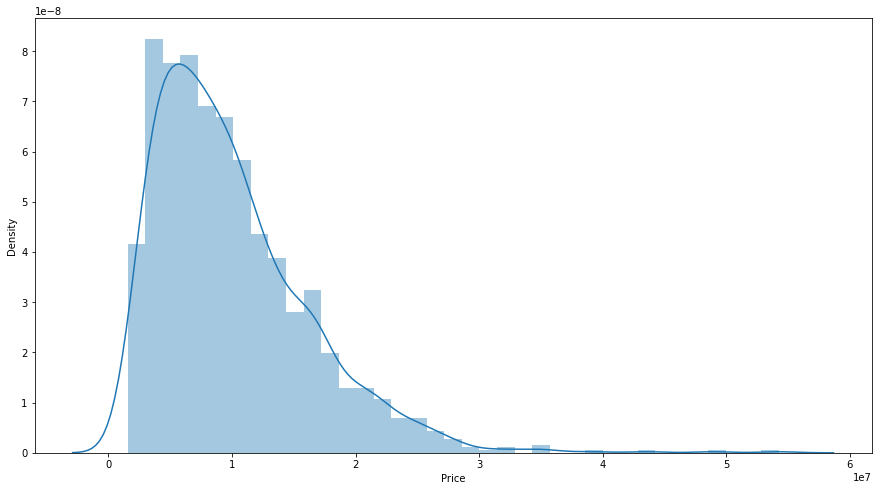

In [211]:
plt.figure(figsize=(15,8))
sns.distplot(data['Price'])

<Axes: >

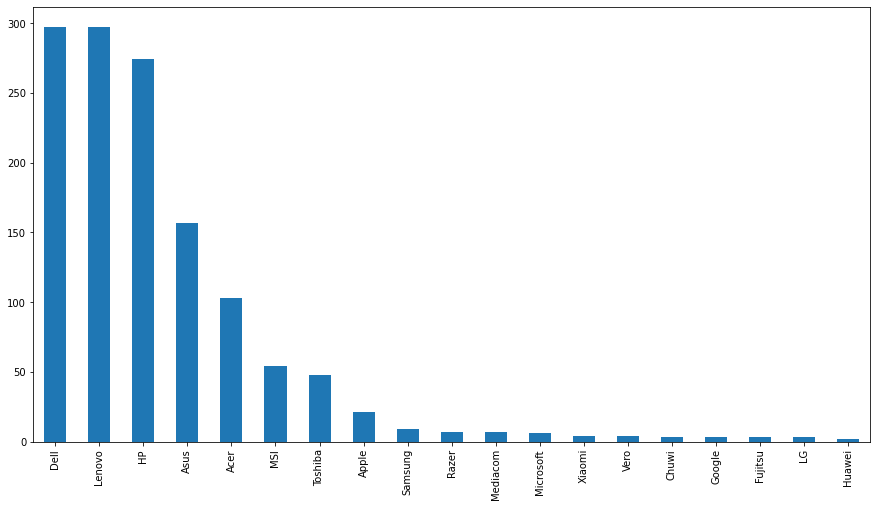

In [212]:
plt.figure(figsize=(15,8))
data['Manufacturer'].value_counts().plot(kind='bar')

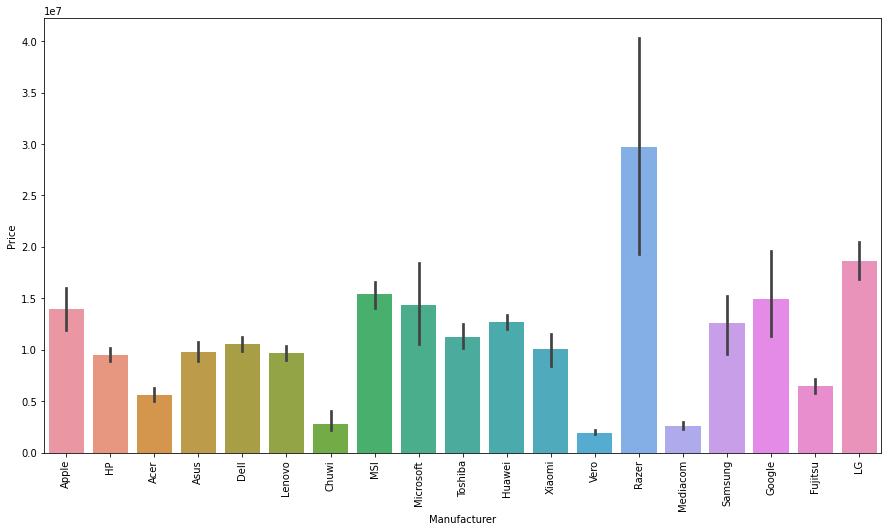

In [213]:
plt.figure(figsize=(15,8))
sns.barplot(x = data['Manufacturer'], y = data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

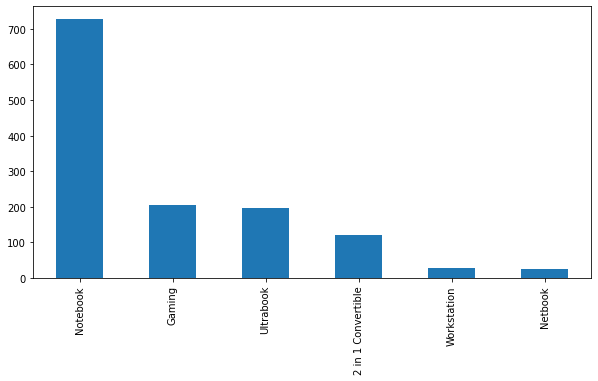

In [214]:
plt.figure(figsize=(10,5))
data['Category'].value_counts().plot(kind='bar')

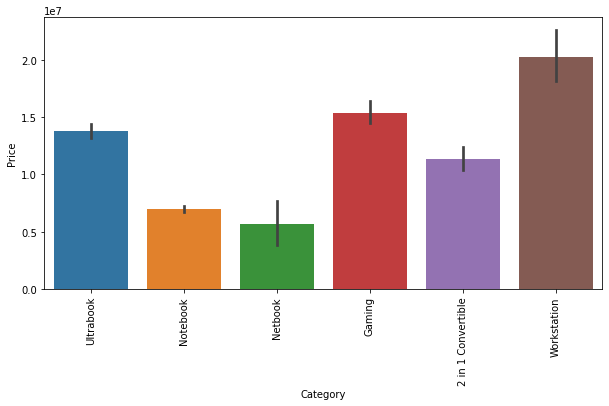

In [215]:
plt.figure(figsize=(10,5))
sns.barplot(x = data['Category'], y = data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

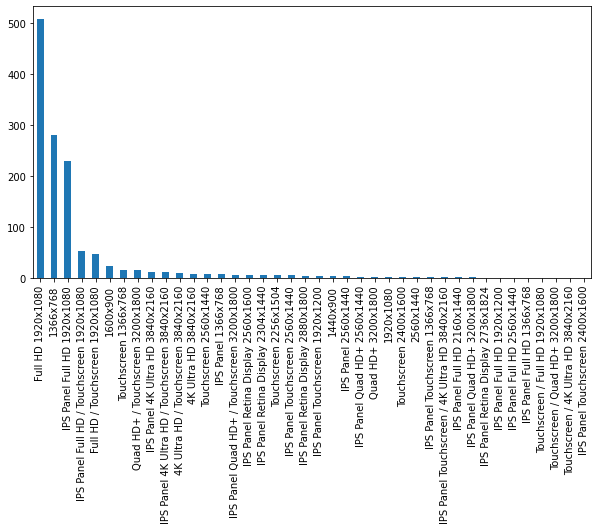

In [216]:
plt.figure(figsize=(10,5))
data['Screen'].value_counts().plot(kind='bar')

In [217]:
data['TouchScreen'] = data['Screen'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
data.sample(5)

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size,TouchScreen
313,Acer,Aspire ES1-531,Notebook,1366x768,Intel Celeron Dual Core N3060 1.6GHz,500GB HDD,Intel HD Graphics 400,Linux,2569788.0,2.40,4,15.6,0
106,Dell,Vostro 3568,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,Windows,6669000.0,2.18,8,15.6,0
212,Lenovo,Legion Y520-15IKBN,Gaming,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,1TB HDD,Nvidia GeForce GTX 1050,Windows,7282548.0,2.40,8,15.6,0
415,Dell,Inspiron 3567,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,AMD Radeon R5 M430,Linux,5325418.8,2.30,4,15.6,0
233,Dell,Vostro 5468,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,Windows,7638228.0,1.60,8,14.0,0


<Axes: xlabel='TouchScreen', ylabel='Price'>

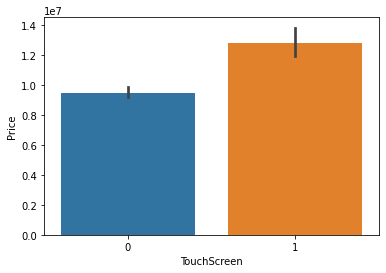

In [218]:
sns.barplot(x = data['TouchScreen'], y = data['Price'])

In [219]:
data['Ips'] = data['Screen'].apply(lambda x: 1 if 'IPS' in x else 0)
data.sample(5)

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size,TouchScreen,Ips
327,Asus,VivoBook S15,Ultrabook,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,256GB SSD,Nvidia GeForce 940MX,Windows,9335710.80,1.70,8,15.6,0,0
913,HP,ProBook 450,Notebook,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,256GB SSD,Nvidia GeForce 930MX,Windows,9060859.08,2.04,8,15.6,0,0
103,HP,Envy 13-ad009n,Ultrabook,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,256GB SSD,Nvidia GeForce MX150,Windows,9950148.00,1.38,8,13.3,0,1
54,Acer,Aspire 3,Notebook,1366x768,Intel Core i3 7100U 2.4GHz,1TB HDD,Intel HD Graphics 620,Windows,3414528.00,2.40,4,15.6,0,0
488,Lenovo,Thinkpad X270,Ultrabook,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,512GB SSD,Intel HD Graphics 620,Windows,15987816.00,1.36,16,12.5,0,1


<Axes: xlabel='Ips', ylabel='Price'>

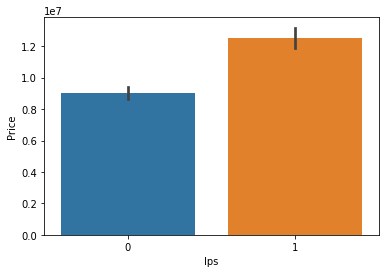

In [220]:
sns.barplot(x = data['Ips'], y = data['Price'])

In [221]:
new = data['Screen'].str.split('x',n=1,expand=True)

In [222]:
data['X_reso'] = new[0]
data['Y_reso'] = new[1]
data.head()

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size,TouchScreen,Ips,X_reso,Y_reso
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,13.3,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,13.3,0,0,1440,900
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,15.6,0,0,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,15.4,0,1,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,13.3,0,1,IPS Panel Retina Display 2560,1600


In [223]:
data['X_reso'] = data['X_reso'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
data.head()

,Manufacturer,Model Name,Category,Screen,CPU,Storage,GPU,Operating System,Price,Weight,RAM,Screen Size,TouchScreen,Ips,X_reso,Y_reso
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,13.3,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,13.3,0,0,1440,900
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,15.6,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,15.4,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,13.3,0,1,2560,1600


In [224]:
data['X_reso'] = data['X_reso'].astype('int64')
data['Y_reso'] = data['Y_reso'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 324
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1302 non-null   object 
 1   Model Name        1302 non-null   object 
 2   Category          1302 non-null   object 
 3   Screen            1302 non-null   object 
 4   CPU               1302 non-null   object 
 5    Storage          1302 non-null   object 
 6   GPU               1302 non-null   object 
 7   Operating System  1302 non-null   object 
 8   Price             1302 non-null   float64
 9   Weight            1302 non-null   float64
 10  RAM               1302 non-null   int64  
 11  Screen Size       1302 non-null   float64
 12  TouchScreen       1302 non-null   int64  
 13  Ips               1302 non-null   int64  
 14  X_reso            1302 non-null   int64  
 15  Y_reso            1302 non-null   int64  
dtypes: float64(3), int64(5), object(8)
memory u

In [225]:
data.corr()['Price']

Price          1.000000
Weight         0.210166
RAM            0.742802
Screen Size    0.067922
TouchScreen    0.189931
Ips            0.252799
X_reso         0.557129
Y_reso         0.553289
Name: Price, dtype: float64

Finding PPI(Pixels Per square Inch)<br>
Formula:<br>
PPI = ((x_reso^2 + y_reso^2)^1/2)/inches

In [226]:
data['ppi'] = (((data['X_reso']**2 + data['Y_reso']**2)**0.5)/data['Screen Size']).astype('float64')

In [227]:
data.corr()['Price']

Price          1.000000
Weight         0.210166
RAM            0.742802
Screen Size    0.067922
TouchScreen    0.189931
Ips            0.252799
X_reso         0.557129
Y_reso         0.553289
ppi            0.473125
Name: Price, dtype: float64

In [228]:
data = data.drop(['X_reso','Y_reso','Screen Size','Screen'],axis=1)
data.head()

,Manufacturer,Model Name,Category,CPU,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005


In [229]:
data['cpu'] = data['CPU'].apply(lambda x: " ".join(x.split()[0:3]))
data.head()

,Manufacturer,Model Name,Category,CPU,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,cpu
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005,Intel Core i5


Creating a function and dividing the CPUs to 5 Categories:
<ul>
    <li>Intel i3</li>
    <li>Intel i5</li>
    <li>Intel i7</li>
    <li>Other Intel Processors</li>
    <li>AMD</li>
</ul>

In [230]:
def fetch_processor(text):
    if text in ['Intel Core i5','Intel Core i7','Intel Core i3']:
        return text
    elif text.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

In [231]:
data['Cpu brand'] = data['cpu'].apply(fetch_processor)

<Axes: >

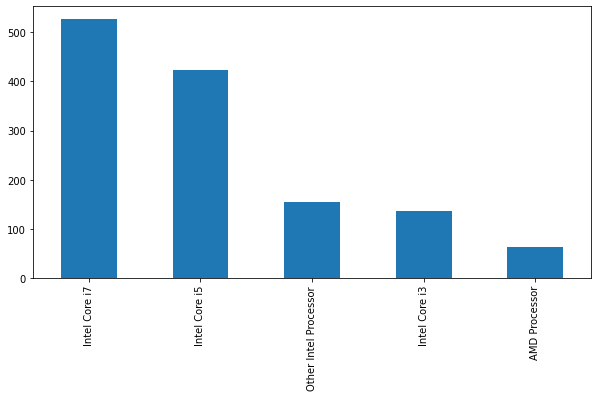

In [232]:
plt.figure(figsize=(10,5))
data['Cpu brand'].value_counts().plot(kind='bar')

<Axes: xlabel='Cpu brand', ylabel='Price'>

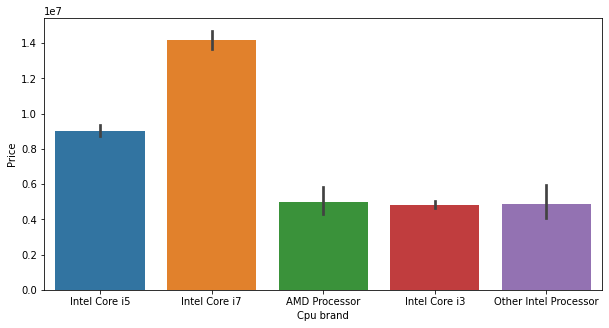

In [233]:
plt.figure(figsize=(10,5))
sns.barplot(x = data['Cpu brand'], y = data['Price'])

In [234]:
data.drop(columns=['CPU','cpu'],inplace=True)
data.head()

,Manufacturer,Model Name,Category,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,Cpu brand
0,Apple,MacBook Pro,Ultrabook,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005,Intel Core i5


<Axes: >

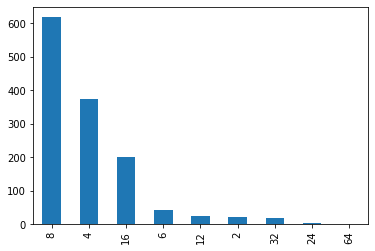

In [235]:
data['RAM'].value_counts().plot(kind='bar')

<Axes: xlabel='RAM', ylabel='Price'>

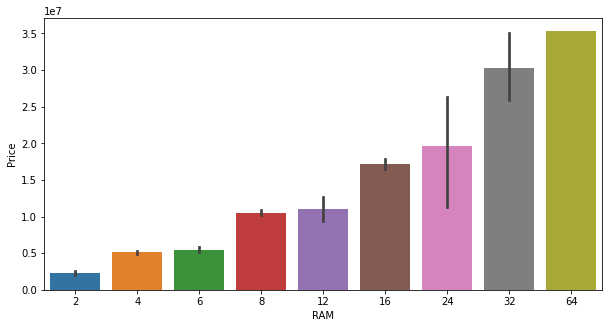

In [236]:
plt.figure(figsize=(10,5))
sns.barplot(x = data['RAM'], y = data['Price'])

In [237]:
data[' Storage'].value_counts()

256GB SSD                        412
1TB HDD                          224
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1TB Hybrid                         9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
1GB SSD                            5
128GB Flash Storage                4
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [238]:
data[' Storage'] = data[' Storage'].astype(str).replace('\.0','',regex=True)
data[' Storage'] = data[' Storage'].astype(str).replace('GB','')
data[' Storage'] = data[' Storage'].astype(str).replace('TB','000')
new = data[' Storage'].str.split('+',n=1,expand=True)

data['first'] = new[0]
data['first'] = data['first'].str.strip()
data['sec'] = new[1]

In [239]:
data['l1hdd'] = data['first'].apply(lambda x: 1 if "HDD" in x else 0)
data['l1ssd'] = data['first'].apply(lambda x: 1 if "SSD" in x else 0)
data['l1hybrid'] = data['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
data['l1fs'] = data['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)
data['first'] = data['first'].str.replace(r'\D','')
data['sec'].fillna('0',inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4752\2945373682.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['first'] = data['first'].str.replace(r'\D','')


In [240]:
data['l2hdd'] = data['sec'].apply(lambda x: 1 if "HDD" in x else 0)
data['l2ssd'] = data['sec'].apply(lambda x: 1 if "SSD" in x else 0)
data['l2hybrid'] = data['sec'].apply(lambda x: 1 if "Hybrid" in x else 0)
data['l2fs'] = data['sec'].apply(lambda x: 1 if "Flash Storage" in x else 0)
data['sec'] = data['sec'].str.replace(r'\D','')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4752\1870853725.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['sec'] = data['sec'].str.replace(r'\D','')


In [241]:
data['first'] = data['first'].astype('int')
data['sec'] = data['sec'].astype('int')

In [242]:
data['HDD'] = data['first']*data['l1hdd'] + data['sec']*data['l2hdd']
data['SSD'] = data['first']*data['l1ssd'] + data['sec']*data['l2ssd']
data['Hybrid'] = data['first']*data['l1hybrid'] + data['sec']*data['l2hybrid']
data['FS'] = data['first']*data['l1fs'] + data['sec']*data['l2fs']

data.drop(columns=['first','sec','l1hdd','l1ssd','l1hybrid','l1fs','l2hdd','l2ssd','l2fs','l2hybrid'],inplace=True)

In [243]:
data.head()

,Manufacturer,Model Name,Category,Storage,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,FS
0,Apple,MacBook Pro,Ultrabook,128GB SSD,Intel Iris Plus Graphics 640,macOS,11912523.48,1.37,8,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,128GB Flash Storage,Intel HD Graphics 6000,macOS,7993374.48,1.34,8,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,250 G6,Notebook,256GB SSD,Intel HD Graphics 620,No OS,5112900.00,1.86,8,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,512GB SSD,AMD Radeon Pro 455,macOS,22563005.40,1.83,16,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,256GB SSD,Intel Iris Plus Graphics 650,macOS,16037611.20,1.37,8,0,1,226.983005,Intel Core i5,0,256,0,0


In [244]:
data.drop(columns=[' Storage'],inplace=True)
data.sample(5)

,Manufacturer,Model Name,Category,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,FS
735,Lenovo,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Notebook,Intel HD Graphics 620,Windows,6926868.0,1.85,4,0,0,141.211998,Intel Core i7,1,0,0,0
615,Asus,FX753VD-GC007T (i7-7700HQ/8GB/1TB,Gaming,Nvidia GeForce GTX 1050,Windows,10385856.0,3.00,8,0,0,127.335675,Intel Core i7,1,128,0,0
823,MSI,GL62M 7RD,Gaming,Nvidia GeForce GTX 1050,Windows,10661508.0,2.40,8,0,0,141.211998,Intel Core i5,0,256,0,0
348,Asus,VivoBook Flip,2 in 1 Convertible,Intel HD Graphics 500,Windows,3334500.0,1.50,4,1,0,135.094211,Other Intel Processor,0,0,0,32
209,Acer,Aspire E5-576G,Notebook,Nvidia GeForce 940MX,Windows,6144372.0,2.23,4,0,0,141.211998,Intel Core i5,0,256,0,0


In [245]:
data = data.drop('Model Name',axis=1)
data.sample(5)

,Manufacturer,Category,GPU,Operating System,Price,Weight,RAM,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,FS
782,Toshiba,Ultrabook,Nvidia GeForce 930M,Windows,15685488.0,1.47,16,0,1,157.350512,Intel Core i7,0,512,0,0
535,Dell,Notebook,Nvidia GeForce 930MX,Windows,12173148.0,1.93,8,0,0,141.211998,Intel Core i7,0,256,0,0
767,Dell,Gaming,Nvidia GeForce GTX 960M,Windows,9772308.0,2.72,16,1,1,282.423996,Intel Core i7,1,128,0,0
617,HP,Ultrabook,Intel HD Graphics 620,Windows,12350988.0,1.84,8,0,0,141.211998,Intel Core i7,0,512,0,0
3,Toshiba,Notebook,Intel HD Graphics 520,Windows,10625940.0,1.20,4,0,0,165.632118,Intel Core i5,0,128,0,0


In [246]:
data = data.rename(columns={'Ips':'IPS'})
data.sample(20)

,Manufacturer,Category,GPU,Operating System,Price,Weight,RAM,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,FS
366,Dell,Notebook,AMD Radeon 530,Windows,9647820.0,2.80,8,0,0,127.335675,Intel Core i5,1,128,0,0
826,Asus,2 in 1 Convertible,Intel HD Graphics 620,Windows,12075336.0,1.10,8,1,0,165.632118,Intel Core i5,0,256,0,0
256,HP,Notebook,AMD Radeon R4 Graphics,Windows,3964942.8,1.91,8,0,0,100.454670,AMD Processor,0,128,0,0
294,Lenovo,Notebook,Intel HD Graphics,Windows,2036268.0,1.50,2,0,0,111.935204,Other Intel Processor,0,0,0,64
461,Acer,Netbook,Intel HD Graphics 400,Windows,3868020.0,1.40,4,0,0,135.094211,Other Intel Processor,0,128,0,0
340,Dell,Notebook,Intel HD Graphics,Linux,2444410.8,2.20,4,0,0,100.454670,Other Intel Processor,500,0,0,0
795,Lenovo,2 in 1 Convertible,Intel HD Graphics 620,Windows,20718360.0,1.42,8,1,1,209.800683,Intel Core i5,0,256,0,0
855,Dell,Notebook,Intel HD Graphics 620,Windows,8402940.0,1.90,8,0,0,141.211998,Intel Core i5,0,128,0,0
399,Lenovo,Ultrabook,Intel HD Graphics 620,Windows,23341500.0,1.13,16,0,1,209.800683,Intel Core i7,0,1,0,0
2,Dell,2 in 1 Convertible,Intel HD Graphics 620,Windows,11550708.0,2.19,12,1,1,141.211998,Intel Core i7,0,512,0,0


In [247]:
data['HDD'] = data['HDD'].apply(lambda x: x*1000 if x==1 or x==2 else x)
data.sample(20)

,Manufacturer,Category,GPU,Operating System,Price,Weight,RAM,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,FS
184,Xiaomi,Notebook,Nvidia GeForce MX150,No OS,10661508.00,1.95,8,0,1,141.211998,Intel Core i5,0,256,0,0
179,HP,2 in 1 Convertible,Intel UHD Graphics 620,Windows,13329108.00,1.29,8,1,1,331.264236,Intel Core i5,0,256,0,0
498,Lenovo,Notebook,Intel HD Graphics 620,Windows,8438508.00,1.40,8,0,1,165.632118,Intel Core i3,0,256,0,0
554,HP,Notebook,Nvidia GeForce 930MX,Windows,11381760.00,2.63,8,0,0,127.335675,Intel Core i7,1000,0,0,0
608,Lenovo,2 in 1 Convertible,Intel HD Graphics 630,Windows,11550708.00,2.00,8,1,1,141.211998,Intel Core i7,0,256,0,0
303,Dell,Notebook,AMD Radeon R5 M430,Linux,7166863.08,2.30,8,0,0,100.454670,Intel Core i7,1000,0,0,0
290,HP,Netbook,Intel HD Graphics 400,Windows,1858428.00,1.17,2,0,0,135.094211,Other Intel Processor,0,0,0,32
583,Dell,Notebook,Nvidia GeForce 930MX,Windows,13670471.88,1.93,16,0,0,141.211998,Intel Core i7,0,256,0,0
389,Lenovo,2 in 1 Convertible,Intel HD Graphics 620,Windows,22310028.00,1.42,16,1,0,209.800683,Intel Core i7,0,512,0,0
83,Asus,Gaming,Nvidia GeForce GTX 965M,No OS,8874216.00,4.00,16,0,1,127.335675,Intel Core i7,1000,0,0,0


In [248]:
data.corr()['Price']

Price          1.000000
Weight         0.210166
RAM            0.742802
TouchScreen    0.189931
IPS            0.252799
ppi            0.473125
HDD           -0.099121
SSD            0.545948
Hybrid        -0.004750
FS            -0.040414
Name: Price, dtype: float64

Dropping Hybrid and Flash Storage as they have very less correlation with price

In [249]:
data.drop(columns={'Hybrid','FS'},inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 324
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      1302 non-null   object 
 1   Category          1302 non-null   object 
 2   GPU               1302 non-null   object 
 3   Operating System  1302 non-null   object 
 4   Price             1302 non-null   float64
 5   Weight            1302 non-null   float64
 6   RAM               1302 non-null   int64  
 7   TouchScreen       1302 non-null   int64  
 8   IPS               1302 non-null   int64  
 9   ppi               1302 non-null   float64
 10  Cpu brand         1302 non-null   object 
 11  HDD               1302 non-null   int64  
 12  SSD               1302 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 142.4+ KB


Converting to Indian Currency

In [250]:
data['Price'] = data['Price']/100
data.head(10)

,Manufacturer,Category,GPU,Operating System,Price,Weight,RAM,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,Intel Iris Plus Graphics 640,macOS,119125.2348,1.37,8,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,Intel HD Graphics 6000,macOS,79933.7448,1.34,8,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,Intel HD Graphics 620,No OS,51129.0000,1.86,8,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,AMD Radeon Pro 455,macOS,225630.0540,1.83,16,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,Intel Iris Plus Graphics 650,macOS,160376.1120,1.37,8,0,1,226.983005,Intel Core i5,0,256
5,Acer,Notebook,AMD Radeon R5,Windows,35568.0000,2.10,4,0,0,100.454670,AMD Processor,500,0
6,Apple,Ultrabook,Intel Iris Pro Graphics,Mac OS,190286.1324,2.04,16,0,1,220.534624,Intel Core i7,0,0
7,Apple,Ultrabook,Intel HD Graphics 6000,macOS,103031.6040,1.34,8,0,0,127.677940,Intel Core i5,0,0
8,Asus,Ultrabook,Nvidia GeForce MX150,Windows,132935.4000,1.30,16,0,0,157.350512,Intel Core i7,0,512
9,Acer,Ultrabook,Intel UHD Graphics 620,Windows,68468.4000,1.60,8,0,1,157.350512,Intel Core i5,0,256


In [251]:
data['Price'] = data['Price'].round(decimals = 2)
data.head()

,Manufacturer,Category,GPU,Operating System,Price,Weight,RAM,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,Intel Iris Plus Graphics 640,macOS,119125.23,1.37,8,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,Intel HD Graphics 6000,macOS,79933.74,1.34,8,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,Intel HD Graphics 620,No OS,51129.00,1.86,8,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,AMD Radeon Pro 455,macOS,225630.05,1.83,16,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,Intel Iris Plus Graphics 650,macOS,160376.11,1.37,8,0,1,226.983005,Intel Core i5,0,256


In [252]:
data['gpu'] = data['GPU'].apply(lambda x:x.split()[0])
data['gpu'].value_counts()

Intel     722
Nvidia    399
AMD       180
ARM         1
Name: gpu, dtype: int64

In [253]:
data = data[data['gpu'] != 'ARM']
data['gpu'].value_counts()

Intel     722
Nvidia    399
AMD       180
Name: gpu, dtype: int64

<Axes: xlabel='gpu', ylabel='Price'>

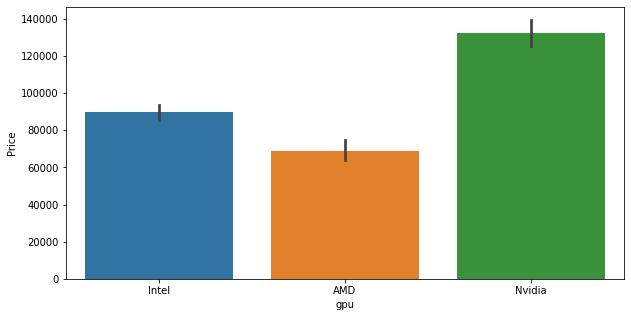

In [254]:
plt.figure(figsize=(10,5))
sns.barplot(x = data['gpu'], y = data['Price'])

In [255]:
data = data.drop('GPU',axis=1)
data.head()

,Manufacturer,Category,Operating System,Price,Weight,RAM,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,gpu
0,Apple,Ultrabook,macOS,119125.23,1.37,8,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,macOS,79933.74,1.34,8,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,No OS,51129.00,1.86,8,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,macOS,225630.05,1.83,16,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,macOS,160376.11,1.37,8,0,1,226.983005,Intel Core i5,0,256,Intel


In [256]:
data['Operating System'].value_counts()

Windows      1124
No OS          66
Linux          62
Chrome OS      26
macOS          13
Mac OS          8
Android         2
Name: Operating System, dtype: int64

<Axes: xlabel='Operating System', ylabel='Price'>

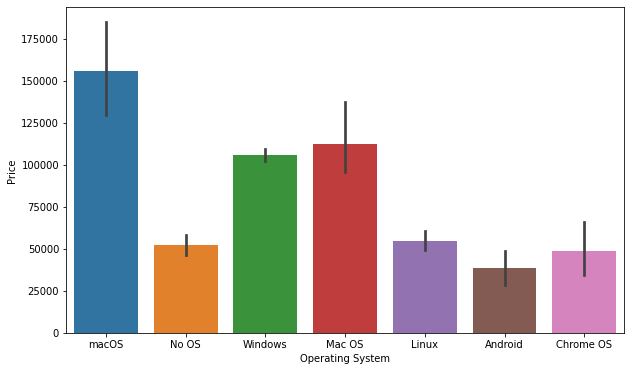

In [257]:
plt.figure(figsize=(10,6))
sns.barplot(x = data['Operating System'], y = data['Price'])

In [258]:
def merge_os(os):
    if os == 'Windows':
        return os
    elif os == 'macOS' or os == 'Mac OS':
        return 'Mac'
    elif os == 'Linux':
        return os
    else:
        return 'Others/No OS'

In [259]:
data['OS'] = data['Operating System'].apply(merge_os)
data.head()

,Manufacturer,Category,Operating System,Price,Weight,RAM,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,gpu,OS
0,Apple,Ultrabook,macOS,119125.23,1.37,8,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,macOS,79933.74,1.34,8,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,No OS,51129.00,1.86,8,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS
3,Apple,Ultrabook,macOS,225630.05,1.83,16,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,macOS,160376.11,1.37,8,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [260]:
data.drop(columns=['Operating System'],inplace=True)
data.head()

,Manufacturer,Category,Price,Weight,RAM,TouchScreen,IPS,ppi,Cpu brand,HDD,SSD,gpu,OS
0,Apple,Ultrabook,119125.23,1.37,8,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,79933.74,1.34,8,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,51129.00,1.86,8,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS
3,Apple,Ultrabook,225630.05,1.83,16,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,160376.11,1.37,8,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


<Axes: xlabel='OS', ylabel='Price'>

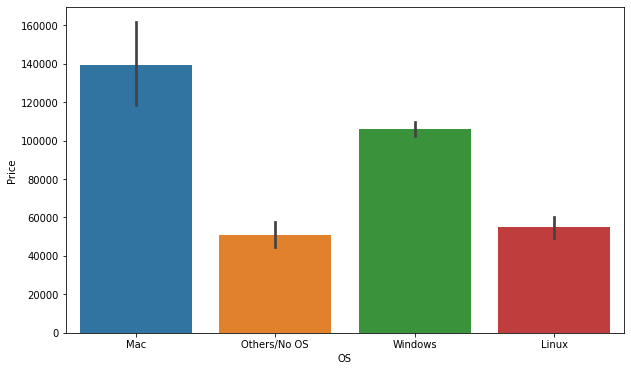

In [261]:
plt.figure(figsize=(10,6))
sns.barplot(x = data['OS'], y = data['Price'])

<Axes: >

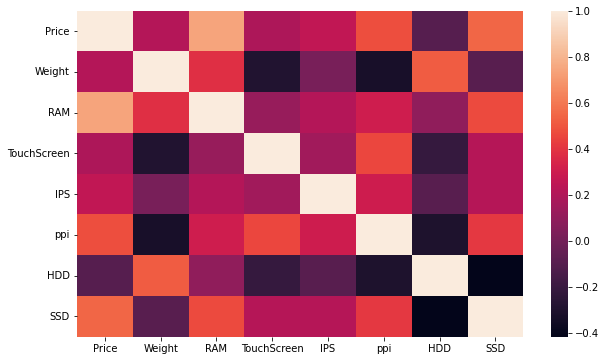

In [262]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4752\638603466.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data['Price']))


<Axes: xlabel='Price', ylabel='Density'>

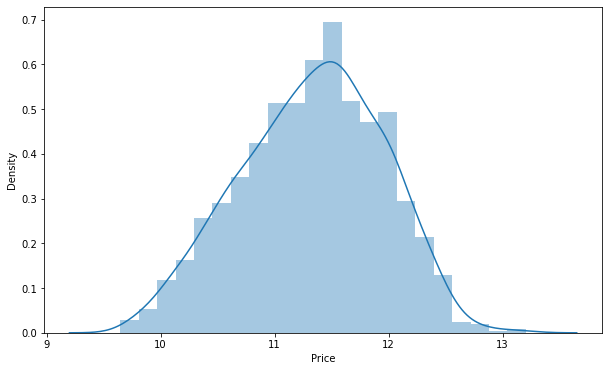

In [263]:
plt.figure(figsize=(10,6))
sns.distplot(np.log(data['Price']))

<h3><center> Prediction Model</center></h3>

In [264]:
x = data.drop('Price',axis=1)
y = np.log(data['Price'])

In [265]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [266]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [267]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor

## Linear Regression

In [268]:
s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

lreg = LinearRegression()
pipe = Pipeline([
     ('s1',s1),
     ('lreg',lreg)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 Score', r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 Score 0.7929870169190781
MAE 0.20910298571747568


## Ridge Regression

In [269]:
s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

rreg = Ridge(alpha=10)
pipe = Pipeline([
     ('s1',s1),
     ('Ridge',rreg)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 Score', r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 Score 0.7966089409399147
MAE 0.21015240820761405


## Lasso Regression

In [270]:
s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

lreg = Lasso(alpha=0.001)
pipe = Pipeline([
     ('s1',s1),
     ('s2',lreg)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 Score', r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 Score 0.7930658599410685
MAE 0.21232357801963408


## KNN

In [271]:
s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

knn = KNeighborsRegressor(n_neighbors=5)
pipe = Pipeline([
     ('s1',s1),
     ('s2',knn)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 Score', r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 Score 0.8238465909617003
MAE 0.20040312746579453


## Decision Tree

In [272]:
s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

dtr = DecisionTreeRegressor(max_depth=8)
pipe = Pipeline([
     ('s1',s1),
     ('s2',dtr)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 Score', r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 Score 0.7805904807466982
MAE 0.21318247343963348


## SVM

In [273]:
s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

svm = SVR(kernel='rbf',C=10000,epsilon=0.1)
pipe = Pipeline([
     ('s1',s1),
     ('s2',svm)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 Score', r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 Score 0.8241587402167647
MAE 0.19195503094136723


## Random Forest Regression

In [274]:
s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

rrr = RandomForestRegressor(n_estimators=500,
                            random_state=3,
                            max_samples=0.7,
                            max_features=0.5,
                            max_depth=15)
pipe = Pipeline([
     ('s1',s1),
     ('s2',rrr)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 Score', r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 Score 0.8718437082434721
MAE 0.16090180292415057


## Extra Trees

In [275]:
s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

xt = ExtraTreesRegressor(n_estimators=100,
                            random_state=3,
                            max_samples=0.7,
                            bootstrap=True,
                            max_features=0.5,
                            max_depth=15)
pipe = Pipeline([
     ('s1',s1),
     ('s2',xt)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 Score', r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 Score 0.873538807628862
MAE 0.1619504861924597


## Ada Boost

In [276]:
s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

s2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
pipe = Pipeline([
     ('s1',s1),
     ('s2',s2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 Score', r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 Score 0.7861418766065117
MAE 0.23111176658294655


## Gradient Boost

In [277]:
s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

s2 = GradientBoostingRegressor(n_estimators=250)
pipe = Pipeline([
     ('s1',s1),
     ('s2',s2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 Score', r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 Score 0.8496616149777594
MAE 0.1742051299964638


## Xgboost

In [278]:
s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

s2 = XGBRegressor(n_estimators=100,max_depth=3,learning_rate=0.5)
pipe = Pipeline([
('s1',s1),
('s2',s2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 Score', r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 Score 0.8673979584464678
MAE 0.16671179513820483


## Voting Regressor

In [279]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

In [280]:
s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=500,random_state=3,max_samples=0.7,max_features=0.5,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=250,max_features=0.5)
xgb = XGBRegressor(n_estimators=100,learning_rate=0.5,max_depth=3)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,bootstrap=True,max_samples=0.7,max_features=0.5,max_depth=15)

s2 = VotingRegressor([('et',et),('rf',rf),('xgb',xgb),('gbdt',gbdt)],weights=[100,50,25,10])
pipe = Pipeline([
     ('s1',s1),
     ('s2',s2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 Score', r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 Score 0.8792956718821592
MAE 0.15782781822610098


## Stacking

In [281]:
s1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],remainder='passthrough')

estms = [
    ('rf',RandomForestRegressor(n_estimators=500,random_state=3,max_samples=0.7,max_features=0.5,max_depth=15)),
    ('xgb',XGBRegressor(n_estimators=100,learning_rate=0.5,max_depth=3)),
    ('et',ExtraTreesRegressor(n_estimators=100,random_state=3,bootstrap=True,max_samples=0.7,max_features=0.5,max_depth=15))    
]

s2 = StackingRegressor(estimators=estms,final_estimator=Ridge(alpha=100))
pipe = Pipeline([
     ('s1',s1),
     ('s2',s2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 Score', r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 Score 0.8785243851932747
MAE 0.16102290162711955


### Exporting Model

In [197]:
import pickle
pickle.dump(data,open('data.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))